In [3]:
#Accuracy
from __future__ import print_function
import numpy as np 

def acc(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
#     print(correct)
    return float(correct)/y_true.shape[0]

y_true = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])
y_pred = np.array([0, 1, 0, 2, 1, 1, 0, 2, 1, 2])
print('accuracy = ', acc(y_true, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_true, y_pred))

accuracy =  0.6
accuracy =  0.6


In [19]:
#Confusion matrix
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
#     print(N)
    cm = np.zeros((N, N))
#     print(y_true.shape)
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
#         print(cm)
    return cm 

cnf_matrix = my_confusion_matrix(y_true, y_pred)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())

# print(cnf_matrix.sum(axis = 1))
normalized_confusion_matrix = cnf_matrix/cnf_matrix.sum(axis = 1, keepdims = True)
print('\nConfusion matrix (with normalizatrion:)')
print(normalized_confusion_matrix)

from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_true, y_pred)
print('\nConfusion matrix:')
print(cnf_matrix1)

Confusion matrix:
[[2. 1. 1.]
 [1. 2. 0.]
 [0. 1. 2.]]

Accuracy: 0.6

Confusion matrix (with normalizatrion:)
[[0.5        0.25       0.25      ]
 [0.33333333 0.66666667 0.        ]
 [0.         0.33333333 0.66666667]]

Confusion matrix:
[[2 1 1]
 [1 2 0]
 [0 1 2]]


ValueError: Unknown format code 'd' for object of type 'float'

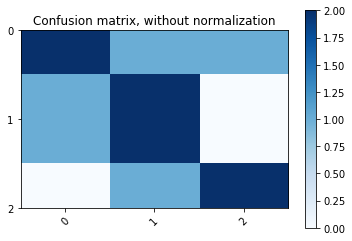

In [24]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

In [31]:
#ROC curve 
# generate simulated data
n0, n1 = 20, 30
score0 = np.random.rand(n0)/2
print(score0)
label0 = np.zeros(n0, dtype = int)
print(label0)
score1  = np.random.rand(n1)/2 + .2
print(score1)
label1 = np.ones(n1, dtype = int)
scores = np.concatenate((score0, score1))
y_true = np.concatenate((label0, label1))

print('True labels:')
print(y_true)
print('\nScores:')
print(scores)

[0.09978219 0.27775451 0.28128501 0.29528535 0.48965938 0.0318059
 0.17074865 0.4379076  0.23551394 0.41485355 0.05481794 0.45180614
 0.14017706 0.3565125  0.41266182 0.47293541 0.05627431 0.25135777
 0.19773978 0.07777025]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.2394597  0.43639408 0.57538939 0.28109068 0.48406893 0.37607461
 0.34398138 0.54766213 0.5043536  0.6089827  0.4503909  0.31784765
 0.5096162  0.36701543 0.57764673 0.59474694 0.56556082 0.4848092
 0.41901752 0.58066508 0.51921429 0.25065542 0.31728995 0.44716329
 0.58808325 0.22475069 0.55277863 0.63608754 0.30611773 0.55786114]
True labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]

Scores:
[0.09978219 0.27775451 0.28128501 0.29528535 0.48965938 0.0318059
 0.17074865 0.4379076  0.23551394 0.41485355 0.05481794 0.45180614
 0.14017706 0.3565125  0.41266182 0.47293541 0.05627431 0.25135777
 0.19773978 0.07777025 0.2394597  0.43639408 0.57538939 0.28109068
 0.4840

In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, scores, pos_label = 1)
print('Thresholds:')
print(thresholds)
print('False Positive Rate:')
print(fpr)
print('True Positive Rate:')
print(tpr)

Thresholds:
[1.63608754 0.63608754 0.5043536  0.48965938 0.48406893 0.45180614
 0.44716329 0.4379076  0.41901752 0.41266182 0.36701543 0.3565125
 0.30611773 0.28128501 0.28109068 0.25135777 0.2394597  0.23551394
 0.22475069 0.0318059 ]
False Positive Rate:
[0.   0.   0.   0.05 0.05 0.15 0.15 0.2  0.2  0.3  0.3  0.35 0.35 0.45
 0.45 0.55 0.55 0.6  0.6  1.  ]
True Positive Rate:
[0.         0.03333333 0.46666667 0.46666667 0.53333333 0.53333333
 0.6        0.6        0.66666667 0.66666667 0.73333333 0.73333333
 0.86666667 0.86666667 0.9        0.9        0.96666667 0.96666667
 1.         1.        ]


In [41]:
#Precision và Recall
from __future__ import print_function
import numpy as np 
# confusion matrix to precision + recall
def cm2pr_binary(cm):
    p = cm[0,0]/np.sum(cm[:,0])
    r = cm[0,0]/np.sum(cm[0])
    return (p, r)

# example of a confusion matrix for binary classification problem 
cm = np.array([[100., 10], [20, 70]])
p,r = cm2pr_binary(cm)
print("precition = {0:.2f}, recall = {1:.2f}".format(p, r))

[100.  10.]
120.0
110.0
precition = 0.83, recall = 0.91


In [45]:
#Micro-average
tp1, fp1, fn1 = 10, 5, 3
tp2, fp2, fn2 = 17, 7, 10
tp3, fp3, fn3 = 25, 2, 4 
# from __future__ import print_function
def PR(tp, fp, fn):
    P = float(tp)/(tp + fp)
    R = float(tp)/(tp + fn)
    return (P, R)

(P1, R1) = PR(tp1, fp1, fn1)
(P2, R2) = PR(tp2, fp2, fn2)
(P3, R3) = PR(tp3, fp3, fn2)

print('(P1, R1) = (%.2f, %.2f)'%(P1, R1))
print('(P2, R2) = (%.2f, %.2f)'%(P2, R2))
print('(P3, R3) = (%.2f, %.2f)'%(P3, R3))

total_tp = tp1 + tp2 + tp3
total_fp = fp1 + fp2 + fp3 
total_fn = fn1 + fn2 + fn3 
micro_ap = float(total_tp)/(total_tp + total_fp)
micro_ar = float(total_tp)/(total_tp + total_fn)
print('(micro_ap, micro_ar) = (%.2f, %.2f)' % (micro_ap, micro_ar))

macro_ap = (P1 + P2 + P3)/3
macro_ar = (R1 + R2 + R3)/3
print('(micro_ap, micro_ar) = (%.2f, %.2f)' % (macro_ap, macro_ar))

(P1, R1) = (0.67, 0.77)
(P2, R2) = (0.71, 0.63)
(P3, R3) = (0.93, 0.71)
(micro_ap, micro_ar) = (0.79, 0.75)
(micro_ap, micro_ar) = (0.77, 0.70)
